In [9]:
import cv2 as cv
import numpy as np
print(cv.__version__)

4.5.5


In [10]:
def show_wait_destroy(winname, img):
    cv.namedWindow(winname, cv.WINDOW_NORMAL)
    cv.imshow(winname, img)
    cv.resizeWindow(winname, 400, 300)
    cv.moveWindow(winname, 380, 200)
    cv.waitKey(0)
    cv.destroyWindow(winname)

In [12]:
image = cv.imread('sudoku_2.png')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
show_wait_destroy('img', gray)

In [13]:
gray = cv.bitwise_not(gray)
bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 15, -2)
show_wait_destroy("binary", bw)

In [7]:
horizontal = np.copy(bw)
vertical = np.copy(bw)
cols = horizontal.shape[1]
horizontal_size = cols // 10
horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))
# Apply morphology operations
horizontal = cv.erode(horizontal, horizontalStructure)
horizontal = cv.dilate(horizontal, horizontalStructure)
# Show extracted horizontal lines
show_wait_destroy("horizontal", horizontal)

In [7]:
rows = vertical.shape[0]
verticalsize = rows // 10
# Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))
# Apply morphology operations
vertical = cv.erode(vertical, verticalStructure)
vertical = cv.dilate(vertical, verticalStructure)
# Show extracted vertical lines
show_wait_destroy("vertical", vertical)

In [8]:
bitwiseOr = cv.bitwise_or(horizontal,vertical)
show_wait_destroy("bitwiseOr", bitwiseOr)


In [9]:
squares = cv.bitwise_not(bitwiseOr)
show_wait_destroy("squares", squares)

In [10]:
merge = cv.bitwise_and(squares, bw)
show_wait_destroy("merge", merge)

In [8]:
import math
img = cv.imread("sudoku.png")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
show_wait_destroy("gray", gray)
edges = cv.Canny(gray, 100,100)
show_wait_destroy("edges", edges)
lines = cv.HoughLinesP(edges, 1, math.pi/2, 2, None, 10, 1)
print(len(lines))
for line in lines[0]:
    pt1 = (line[0],line[1])
    pt2 = (line[2],line[3])
    cv.line(img, pt1, pt2, (0,0,255), 3)
show_wait_destroy("merge", img)

456


In [14]:
import cv2
image = cv2.imread('sudoku_2.png')
result = image.copy()
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
show_wait_destroy("thresh", thresh)
cols = horizontal.shape[1]
horizontal_size = cols // 5
# Detect horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size,1))
detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
show_wait_destroy("detect_horizontal", detect_horizontal)
cnts_h = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts_h = cnts_h[0] if len(cnts_h) == 2 else cnts_h[1]
# print(cnts_h)
for c in cnts_h:
    cv2.drawContours(result, [c], -1, (36,255,12), 2)
    
show_wait_destroy("result-1", result)
rows = vertical.shape[0]
verticalsize = rows // 5
# Detect vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,verticalsize))
detect_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
show_wait_destroy("detect_horizontal", detect_vertical)
cnts_v = cv2.findContours(detect_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts_v = cnts_v[0] if len(cnts_v) == 2 else cnts_v[1]
for c in cnts_v:
    cv2.drawContours(result, [c], -1, (36,255,12), 2)
    
show_wait_destroy("result-2", result)

In [15]:
show_wait_destroy("result", result)

In [111]:
print(cnts_h[6])
print(cnts_v[6])

[[[  5   2]]

 [[  5   3]]

 [[224   3]]

 [[224   2]]]
[[[  3   2]]

 [[  3 221]]

 [[  3 113]]

 [[  4 112]]

 [[  4   2]]]


In [118]:
out = cv2.rectangle(result, (37,2),(3,38), (0, 0, 255), 2)
show_wait_destroy("result", out)

In [122]:
for c in cnts_h[0]:
    print(c[0][0])

5
5
224
224


In [16]:
flat_list =[]
for list in cnts_v:
    for sublist in list:
        flat_list.append(sublist[0][0])
print(flat_list)

[221, 221, 222, 222, 186, 186, 149, 149, 113, 113, 76, 76, 39, 39, 3, 3, 3, 4, 4]


In [18]:
f1 = [sublist[0][1] for lists in cnts_h for sublist in lists]
h_max = max(f1)
h_min = min(f1)


In [19]:
print(h_max)
print(h_min)
h_splits = (h_max+h_min)//len(cnts_h)
print(h_splits)

1199
0
119


In [20]:
show_wait_destroy("result", image)

In [87]:
for points in flat_list:
    if int(points)+1 in flat_list or int(points)+2 in flat_list or points in flat_list or int(points)+3 in flat_list:
        flat_list.remove(points)
print(flat_list)

[221, 222, 186, 149, 113, 76, 39, 3, 4]


In [17]:
latest_flat=[]
for points in flat_list:
    if points not in latest_flat:
        latest_flat.append(points)
latest_flat=sorted(latest_flat)

In [18]:
print(latest_flat)

[3, 4, 39, 76, 113, 149, 186, 221, 222]


In [13]:
remove= []
for pointX in range(len(latest_flat)):
    for pointY in range(0,len(latest_flat)-1):
        if int(latest_flat[pointX])-int(latest_flat[pointY]) <=5 and int(latest_flat[pointX])-int(latest_flat[pointY]) >= 0:
            remove.append(latest_flat[pointY])
print(remove)

[3, 3, 4, 39, 76, 113, 149, 186, 221, 221]


In [19]:
remove= []
for x in latest_flat:
    y_list = [*range(x,x+10)]
    for y in y_list:
        if ( y in  latest_flat):
            remove.append(y)

In [20]:
print(remove)

[3, 4, 4, 39, 76, 113, 149, 186, 221, 222, 222]


In [129]:
def rem(latest_flat,current):
    latest_flat = latest_flat[:max(current - 2, 0)] + latest_flat[current:]
    print(latest_flat)
    return latest_flat

for x in latest_flat:
    rem(latest_flat,x)
#     print(x)
print(latest_flat)

[3, 76, 113, 149, 186, 221, 222]
[3, 4, 113, 149, 186, 221, 222]
[3, 4, 39, 76, 113, 149, 186, 221, 222]
[3, 4, 39, 76, 113, 149, 186, 221, 222]
[3, 4, 39, 76, 113, 149, 186, 221, 222]
[3, 4, 39, 76, 113, 149, 186, 221, 222]
[3, 4, 39, 76, 113, 149, 186, 221, 222]
[3, 4, 39, 76, 113, 149, 186, 221, 222]
[3, 4, 39, 76, 113, 149, 186, 221, 222]
[3, 4, 39, 76, 113, 149, 186, 221, 222]


In [21]:
for x  in latest_flat:
    if (int(x)+1)  in latest_flat:
        latest_flat.remove(int(x)+1)
    if (int(x)+2)  in latest_flat:
        latest_flat.remove(int(x)+2)
    if (int(x)+3)  in latest_flat:
        latest_flat.remove(int(x)+3)
print(latest_flat)

[3, 39, 76, 113, 149, 186, 221]


In [138]:
for i in range(len(latest_flat)-1):
    x = zip(latest_flat[i],latest_flat[i+1])
print(x)

TypeError: 'numpy.intc' object is not iterable

In [22]:
i=0
for x_v , y_v in zip(latest_flat, latest_flat[1:]):
    for x_h , y_h in zip(latest_flat, latest_flat[1:]):
#         print(x_v,y_v,x_h,y_h)
        i+=1
#         x_v = 4
#         y_v = 39
        cropped_image = image[x_v:y_v ,x_h:y_h]
        gray = cv2.cvtColor(cropped_image,cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
        show_wait_destroy("sample",cropped_image)
        show_wait_destroy("thresh", thresh)
        cv2.imwrite("cropped_images\image_"+str(i)+'.png',thresh)
        

# CNN for image inference


In [23]:
import os
import csv
import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from numpy import newaxis
from PIL import Image
from tensorflow.keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K

tensorflow version is 2.8.0
(60000, 28, 28)


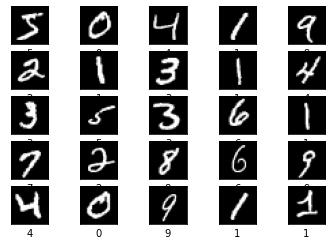

In [24]:
print("tensorflow version is "+ str(tf.__version__))
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap='gray')
  plt.xlabel(Y_train[i])
  plt.gray()
plt.show()

In [25]:
unique_train,frequency_train=np.unique(Y_train,return_counts=True)
total=np.sum(frequency_train)
print("unique labels: {} \nFrequency of individual labels: {} \nTotal sum is: {}".format(unique_train,frequency_train,total))
X_train=X_train/255
X_test=X_test/255
print(X_train.shape)
np.reshape(X_train,(-1,28,28))
X_train=X_train[:,:,:,newaxis]
np.reshape(X_test,(-1,28,28,1))
X_test=X_test[:,:,:,newaxis]
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

unique labels: [0 1 2 3 4 5 6 7 8 9] 
Frequency of individual labels: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949] 
Total sum is: 60000
(60000, 28, 28)
X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


In [26]:
Y_train=to_categorical(Y_train,num_classes=10)
Y_test=to_categorical(Y_test,num_classes=10)
print(Y_test)
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.1)
np.reshape(X_val,(-1,28,28))
print("x_train: ",X_train.shape)
print("x_test: ",X_val.shape)
print("y_train: ",Y_train.shape)
print("y_test: ",Y_val.shape)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
x_train:  (54000, 28, 28, 1)
x_test:  (6000, 28, 28, 1)
y_train:  (54000, 10)
y_test:  (6000, 10)


In [27]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='Same',activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation = "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [28]:
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy","AUC"])
batch_size=32
epochs=20
class StoreModelHistory(keras.callbacks.Callback):

  def on_epoch_end(self,batch,logs=None):
    if ('lr' not in logs.keys()):
      logs.setdefault('lr',0)
      logs['lr'] = K.get_value(self.model.optimizer.lr)

    if not ('model_history.csv' in os.listdir(os.getcwd())):
      with open('model_history.csv','a') as f:
        y=csv.DictWriter(f,logs.keys())
        y.writeheader()

    with open('model_history.csv','a') as f:
      y=csv.DictWriter(f,logs.keys())
      y.writerow(logs)
%load_ext tensorboard

In [29]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
hist= model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_val,Y_val),steps_per_epoch=1600//batch_size,callbacks=[StoreModelHistory(),tensorboard_callback])
print(hist.history)
%tensorboard --logdir logs/fit

Epoch 1/20
50/50 [==============================] - 85s 1s/step - loss: 1.9278 - accuracy: 0.3200 - auc: 0.7457 - val_loss: 1.2195 - val_accuracy: 0.6612 - val_auc: 0.9391 - lr: 0.0010
Epoch 2/20
50/50 [==============================] - 45s 912ms/step - loss: 1.0317 - accuracy: 0.6544 - auc: 0.9399 - val_loss: 0.5092 - val_accuracy: 0.8673 - val_auc: 0.9893 - lr: 0.0010
Epoch 3/20
50/50 [==============================] - 36s 729ms/step - loss: 0.6424 - accuracy: 0.7763 - auc: 0.9762 - val_loss: 0.3297 - val_accuracy: 0.9108 - val_auc: 0.9944 - lr: 0.0010
Epoch 4/20
50/50 [==============================] - 44s 875ms/step - loss: 0.5205 - accuracy: 0.8338 - auc: 0.9829 - val_loss: 0.2572 - val_accuracy: 0.9262 - val_auc: 0.9961 - lr: 0.0010
Epoch 5/20
50/50 [==============================] - 38s 775ms/step - loss: 0.4139 - accuracy: 0.8687 - auc: 0.9876 - val_loss: 0.2603 - val_accuracy: 0.9182 - val_auc: 0.9953 - lr: 0.0010
Epoch 6/20
50/50 [==============================] - 44s 885ms/s

Reusing TensorBoard on port 6006 (pid 2024), started 8 days, 22:40:53 ago. (Use '!kill 2024' to kill it.)

In [32]:
sudoku_list=[]
row = []
for x in range(1,37):
    inter_path = r'C:\Users\Living Room\cropped_images\image_'
    img_path= inter_path+str(x)+'.png'
    # print(img_path)
    img = tf.keras.utils.load_img(
        img_path, target_size=(28,28))
    img = tf.image.rgb_to_grayscale(img)
    #img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img, 0) 

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    x = np.argmax(predictions, axis=None, out=None)
#     print(x)
    row.append(x)
    if (len(row) == len(latest_flat)-1):
        sudoku_list.append(row)
        row = []
    

print(sudoku_list)

[[5, 6, 6, 6, 4, 6], [0, 5, 3, 5, 5, 5], [5, 5, 4, 5, 5, 5], [6, 8, 8, 4, 8, 8], [5, 5, 5, 3, 5, 5], [8, 1, 8, 8, 8, 8]]


In [28]:
img_path=r'C:\Users\Living Room\cropped_images\image_2.png'
img = tf.keras.utils.load_img(
    img_path, target_size=(28,28))
img = tf.image.rgb_to_grayscale(img)
#img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img, 0) # Create a batch
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
x = np.argmax(predictions, axis=None, out=None)
print(x)        

7
